<a href="https://colab.research.google.com/github/datanalyz3r/rnn_gru_sales_prediction/blob/main/SALES_FORECAST_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IF CODE RUNS IN GOOGLE COLAB, UPGRADE VERSIONS OF PANDAS AND XLRD FOR CORREСT WORK OF CODE
!pip install --upgrade pandas
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 KB 5.0 MB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [2]:
#CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#IMPORT LIABRARIES
import pandas as pd
import numpy as np
import os
import zipfile
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import feature_selection

In [4]:
#ASSIGN TO VARIABLE PATH TO TRAIN DATA
my_direct = r"/content/gdrive/My Drive/PRJORD/"

In [5]:
#CREATE FUNCTION FOR READ ALL EXCEL FILES FROM DIRRECTORY AND STACK IT IN ONE DATAFRAME
def read_and_collect(directory):
  timeless_df = pd.DataFrame()
  i = 0
  for a in os.listdir(directory):
    if i==0:
      df=pd.read_excel(directory+a)
      i+=1
    else:
      timeless_df = pd.read_excel(directory+a)
      df=pd.concat([df, timeless_df], ignore_index=True)
  return df

In [6]:
a = read_and_collect(my_direct)

In [7]:
#CREATE FUNCTION TO DELETE EMTY RAWS THAT SEPARATE CATEGORIES OF GOODS
def nadroper(df):
  ab= df[(pd.isna(a['Дата']) == True)].index
  df=df.drop(index=ab, axis=0)
  return df

In [8]:
a = nadroper(a)

In [9]:
#THIS TABLE CONTAINES DATA OF ALL ACTIONS MAKING WITH PRODUCTS (SALES, RECEPTIONS, WRITE-OFF)
#WE ONLY NEED TO USE AND PREDICT DATA OF SALES
a

,Код,Артикул,Товар,Партия,Склад,Ед.изм.,Кол-во,Сумма,Тип,Номер,Контрагент,Дата,Комментарий
1,12344,NaN,Adalya 50g Acai,NaN,АРГУНОВСКАЯ,Шт.,1.0,150.0,Приемка,00518,ЛОГИСТИК ИНТЕРНЕШНЛ ООО (Хукофф),2022-02-23 06:00:00,"Бровкин, ООО ""ЛОГИСТИК ИНТЕРНЕШНЛ"" (Хукофф)"
2,12344,NaN,Adalya 50g Acai,NaN,ВИДНОЕ,Шт.,-1.0,-145.0,Розничная продажа,06352,Розничный покупатель,2022-02-20 20:38:37,NaN
3,12353,NaN,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",NaN,ЛЕНИНСКИЙ,Шт.,-1.0,-145.0,Розничная продажа,03447,Розничный покупатель,2022-02-20 18:11:32,NaN
4,12353,NaN,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",NaN,ОСТАНКИНО,Шт.,-1.0,-145.0,Розничная продажа,03888,Розничный покупатель,2022-02-06 18:34:23,NaN
5,12353,NaN,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",NaN,ОСТАНКИНО,Шт.,-1.0,-145.0,Розничная продажа,04031,Розничный покупатель,2022-02-07 19:38:20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311845,20460,NaN,Электронный Испаритель Vozol D6 Кокос-Лимонный...,NaN,ОСТАНКИНО,шт,-1.0,-390.0,Розничная продажа,17006,Розничный покупатель,2022-05-17 14:26:38,NaN
311846,20460,NaN,Электронный Испаритель Vozol D6 Кокос-Лимонный...,NaN,СПАССКАЯ,шт,-1.0,-451.0,Розничная продажа,17671,Розничный покупатель,2022-05-11 13:16:06,NaN
311847,20462,NaN,Электронный Испаритель Vozol D6 Персик-Гуава,NaN,СПАССКАЯ,шт,-1.0,-390.0,Розничная продажа,17671,Розничный покупатель,2022-05-11 13:16:06,NaN
311848,20464,NaN,Электронный Испаритель Vozol D6 Рэдбулл-Яблоко...,NaN,ВИДНОЕ,шт,-1.0,-390.0,Розничная продажа,20347,Розничный покупатель,2022-05-25 16:02:02,NaN


In [31]:
#CREATE DATAFRAME COMPOSED FROM SALES AND MULTIPLY NUMBERS OF SALES AND NUMBERS OF GOODS ON (-1)
# IT'S DONE BECAUSE IN ORIGINAL TABLES IT HAS MINUS SIGN AND SHOWES THAT EXPENDED FROM THE BALANCE
sale = pd.DataFrame(a.groupby(['Тип']).get_group('Розничная продажа'))
sale['Сумма']=sale['Сумма']*(-1)
sale['Кол-во']=sale['Кол-во']*(-1)

In [32]:
#RESET INDEX OF DATAFRAME THAT THE RAWS ARE NUMBERED IN ORDER
sale=sale.reset_index()

In [33]:
#DROP COLUMN CONTAINS OLD INDEX
sale=sale.drop(['index'], axis=1)

In [13]:
sale

,Код,Артикул,Товар,Партия,Склад,Ед.изм.,Кол-во,Сумма,Тип,Номер,Контрагент,Дата,Комментарий
0,12344,NaN,Adalya 50g Acai,NaN,ВИДНОЕ,Шт.,1.0,145.0,Розничная продажа,06352,Розничный покупатель,2022-02-20 20:38:37,NaN
1,12353,NaN,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",NaN,ЛЕНИНСКИЙ,Шт.,1.0,145.0,Розничная продажа,03447,Розничный покупатель,2022-02-20 18:11:32,NaN
2,12353,NaN,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",NaN,ОСТАНКИНО,Шт.,1.0,145.0,Розничная продажа,03888,Розничный покупатель,2022-02-06 18:34:23,NaN
3,12353,NaN,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",NaN,ОСТАНКИНО,Шт.,1.0,145.0,Розничная продажа,04031,Розничный покупатель,2022-02-07 19:38:20,NaN
4,12353,NaN,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",NaN,ОСТАНКИНО,Шт.,2.0,300.0,Розничная продажа,06478,Розничный покупатель,2022-02-25 14:29:33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226039,20460,NaN,Электронный Испаритель Vozol D6 Кокос-Лимонный...,NaN,ОСТАНКИНО,шт,1.0,390.0,Розничная продажа,17006,Розничный покупатель,2022-05-17 14:26:38,NaN
226040,20460,NaN,Электронный Испаритель Vozol D6 Кокос-Лимонный...,NaN,СПАССКАЯ,шт,1.0,451.0,Розничная продажа,17671,Розничный покупатель,2022-05-11 13:16:06,NaN
226041,20462,NaN,Электронный Испаритель Vozol D6 Персик-Гуава,NaN,СПАССКАЯ,шт,1.0,390.0,Розничная продажа,17671,Розничный покупатель,2022-05-11 13:16:06,NaN
226042,20464,NaN,Электронный Испаритель Vozol D6 Рэдбулл-Яблоко...,NaN,ВИДНОЕ,шт,1.0,390.0,Розничная продажа,20347,Розничный покупатель,2022-05-25 16:02:02,NaN


In [14]:
#ASSIGN TO VARIABLE PATH TO TEST DATA
test_data_dir = r"/content/gdrive/My Drive/VALSALE/"

In [34]:
#DOING THE SAME ACTIONS FOR TEST DATA
b = read_and_collect(test_data_dir)

In [35]:
sale_t = pd.DataFrame(b.groupby(['Тип']).get_group('Розничная продажа'))
sale_t['Сумма']=sale_t['Сумма']*(-1)
sale_t['Кол-во']=sale_t['Кол-во']*(-1)

In [36]:
sale_t=sale_t.reset_index()

In [37]:
sale_t=sale_t.drop(['index'], axis=1)

In [19]:
sale_t

,Код,Артикул,Товар,Партия,Склад,Ед.изм.,Кол-во,Сумма,Тип,Номер,Контрагент,Дата,Комментарий
0,23875,NaN,Adalya 20g Blue Ice,NaN,ОСТАНКИНО,шт,1.0,107.0,Розничная продажа,20679,Розничный покупатель,2022-06-13 20:27:03,NaN
1,23948,NaN,Adalya 20g Blue Melon,NaN,АРГУНОВСКАЯ,Шт.,1.0,107.0,Розничная продажа,19832,Розничный покупатель,2022-06-10 10:04:16,NaN
2,23787,NaN,Adalya 20g Cherry,NaN,ВИДНОЕ,Шт.,1.0,107.0,Розничная продажа,23388,Розничный покупатель,2022-06-15 11:47:00,NaN
3,23787,NaN,Adalya 20g Cherry,NaN,ОСТАНКИНО,Шт.,1.0,107.0,Розничная продажа,19862,Розничный покупатель,2022-06-07 21:00:57,NaN
4,23789,NaN,Adalya 20g Citrus Fruits,NaN,АРГУНОВСКАЯ,Шт.,1.0,107.0,Розничная продажа,19925,Розничный покупатель,2022-06-10 18:30:21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34364,20464,NaN,Электронный Испаритель Vozol D6 Рэдбулл-Яблоко...,NaN,ВЕРХНИЕ ЛИХОБОРЫ,шт,1.0,489.5,Розничная продажа,31173,Розничный покупатель,2022-06-03 18:22:11,NaN
34365,19229,NaN,Электронный Испаритель Woodu Pod 1200 Арбуз,NaN,ЛЕНИНСКИЙ,шт,1.0,410.0,Розничная продажа,13343,Розничный покупатель,2022-06-08 11:52:01,NaN
34366,19540,NaN,Электронный Испаритель Woodu Pod 1200 Банан Айс,NaN,ЛЕНИНСКИЙ,Шт.,1.0,410.0,Розничная продажа,13051,Розничный покупатель,2022-06-05 13:26:58,NaN
34367,19815,NaN,Электронный Испаритель Woodu Pod 1200 Персик Айс,NaN,ЛЕНИНСКИЙ,Шт.,1.0,459.2,Розничная продажа,12577,Розничный покупатель,2022-05-31 15:34:21,NaN


In [38]:
#MAKE ENCODERS FOR PRODUCT AND SHOP

le_sk=preprocessing.LabelEncoder()
le_sk.fit(sale['Склад'])
sale['sklad'] = le_sk.transform(sale['Склад'])
sale_t['sklad'] = le_sk.transform(sale_t['Склад'])

#AS HAVING MANY PRODUCTS, FOR CREATING LABEL FEATURE USE ONLY FIRST TWO WORDS OF PRODUCT NAME. IT MAY HELP NEURAL NETWORK GENERALIZE PRODUCT FEATURES. 
tov=[]
for i in sale['Товар']:
  j=i.split(' ')
  p=[j[0], j[1]]
  k=' '.join(p)
  tov.append(k)

tov_t=[]
for i in sale_t['Товар']:
  j=i.split(' ')
  p=[j[0], j[1]]
  k=' '.join(p)
  tov_t.append(k)

#CREATE SUITABLE DATA TYPE FOR TRANSFORM COLUMNS TO LABELS
tov=pd.Series(tov)
tov_t=pd.Series(tov_t)

le_tov=preprocessing.LabelEncoder()
all_goods=pd.concat([tov, tov_t])
le_tov.fit(all_goods)

#CREATE TRANSFORMED COLUMNS
sale['tip']=le_tov.transform(tov)
sale_t['tip']=le_tov.transform(tov_t)

In [40]:
#NORMALIZE DATA
norm_sk=preprocessing.MinMaxScaler()

normalized_data=pd.concat([sale[['Кол-во','Сумма']], sale_t[['Кол-во','Сумма']]])
norm_sk.fit(normalized_data)

sale[['Кол-во','Сумма']]=norm_sk.transform(sale[['Кол-во','Сумма']])
sale_t[['Кол-во','Сумма']]=norm_sk.transform(sale_t[['Кол-во','Сумма']])

In [41]:
#CREATE DATAFRAMES ONLY WITH COLUMNS PLANNED TO USE
sale_fin = pd.DataFrame()
sale_fin['Товар']=sale['Товар']
sale_fin['Кол-во']=sale['Кол-во']
sale_fin['Цена']=sale['Сумма']
sale_fin['Дата']=sale['Дата']
sale_fin['Склад']=sale['sklad']
sale_fin['Тип']=sale['tip']

In [42]:
sale_fin_test = pd.DataFrame()
sale_fin_test['Товар']=sale_t['Товар']
sale_fin_test['Кол-во']=sale_t['Кол-во']
sale_fin_test['Цена']=sale_t['Сумма']
sale_fin_test['Дата']=sale_t['Дата']
sale_fin_test['Склад']=sale_t['sklad']
sale_fin_test['Тип']=sale_t['tip']

In [39]:
sale['Кол-во'].max()

190.0

In [43]:
#TAKE FIRST AND LAST DAY FROM DATA
#NEXT WE WILL USE IT FOR GROUP SALES BY DAYS
fin_date=sale_fin['Дата'].max().date()
start_date=sale_fin['Дата'].min().date()

In [44]:
fin_date_test=sale_fin_test['Дата'].max().date()
start_date_test=sale_fin_test['Дата'].min().date()

In [45]:
sale_fin

,Товар,Кол-во,Цена,Дата,Склад,Тип
0,Adalya 50g Acai,0.002639,0.005928,2022-02-20 20:38:37,2,1
1,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",0.002639,0.005928,2022-02-20 18:11:32,4,1
2,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",0.002639,0.005928,2022-02-06 18:34:23,5,1
3,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",0.002639,0.005928,2022-02-07 19:38:20,5,1
4,"Adalya 50g Angel Lips (Малина , Дыня и Мята)",0.007916,0.012265,2022-02-25 14:29:33,5,1
...,...,...,...,...,...,...
226039,Электронный Испаритель Vozol D6 Кокос-Лимонный...,0.002639,0.015944,2022-05-17 14:26:38,5,1210
226040,Электронный Испаритель Vozol D6 Кокос-Лимонный...,0.002639,0.018438,2022-05-11 13:16:06,6,1210
226041,Электронный Испаритель Vozol D6 Персик-Гуава,0.002639,0.015944,2022-05-11 13:16:06,6,1210
226042,Электронный Испаритель Vozol D6 Рэдбулл-Яблоко...,0.002639,0.015944,2022-05-25 16:02:02,2,1210


In [46]:
sale_fin_test

,Товар,Кол-во,Цена,Дата,Склад,Тип
0,Adalya 20g Blue Ice,0.002639,0.004374,2022-06-13 20:27:03,5,0
1,Adalya 20g Blue Melon,0.002639,0.004374,2022-06-10 10:04:16,0,0
2,Adalya 20g Cherry,0.002639,0.004374,2022-06-15 11:47:00,2,0
3,Adalya 20g Cherry,0.002639,0.004374,2022-06-07 21:00:57,5,0
4,Adalya 20g Citrus Fruits,0.002639,0.004374,2022-06-10 18:30:21,0,0
...,...,...,...,...,...,...
34364,Электронный Испаритель Vozol D6 Рэдбулл-Яблоко...,0.002639,0.020012,2022-06-03 18:22:11,1,1210
34365,Электронный Испаритель Woodu Pod 1200 Арбуз,0.002639,0.016762,2022-06-08 11:52:01,4,1210
34366,Электронный Испаритель Woodu Pod 1200 Банан Айс,0.002639,0.016762,2022-06-05 13:26:58,4,1210
34367,Электронный Испаритель Woodu Pod 1200 Персик Айс,0.002639,0.018773,2022-05-31 15:34:21,4,1210


In [47]:
#DELETE SHOP LABEL BECAUSE WE WANT INFORMATION OF SALES BY ALL SHOPS
sale_fin=sale_fin.drop(['Склад'], axis=1)
sale_fin_test=sale_fin_test.drop(['Склад'], axis=1)

In [48]:
#CREATE DATETIME INDEX FOR TEST DATA
index = pd.date_range(start=start_date, end=fin_date, freq='D')

In [49]:
index_t = pd.date_range(start=start_date_test, end=fin_date_test, freq='D')

In [50]:
#COLLECT UNIQUE VALUES FOR ENCODED PRODUCT FUTURES
sale_dict = list(sale_fin['Тип'].drop_duplicates())

In [51]:
sale_dict_t = list(sale_fin_test['Тип'].drop_duplicates())

In [52]:
#CREATE FUNCTION FOR GROUP BY PRODUCT LABEL AND RESAMPLE TO SALES PER DAY
def grouperday(df, s='Тип'):
  y = {}
  a = df.groupby(s)
  for x in a.groups:
    df = pd.DataFrame(a.get_group(x))
    df = df.resample('D', on='Дата').sum()
    y[x] = pd.DataFrame(df)
  return y

In [53]:
#CREATE FUNCTION THAT REDUCE DATA TO A COMMON TIME INTERVAL
#RETURN DICTIONARY WITH KEYS EQUAL LABEL PRODUCTS AND VALUES EQUAL DATAFRAME OF IT LABEL PRODUCT
def to_interval(dict_of_train_data, index):
  for i in dict_of_train_data.keys():
    dict_of_train_data[i]=dict_of_train_data[i].reindex(index,fill_value=0)
  return dict_of_train_data

In [ ]:
sale_perh=grouperday(sale_fin)

In [55]:
sale_perh=to_interval(sale_perh, index)

In [ ]:
sale_perh_t=grouperday(sale_fin_test)
sale_perh_t=to_interval(sale_perh_t, index_t)

In [63]:
#APPLY TRASHHOLD TO FILTER SPARSE PRODUCT MATRICIES
#AT VERY LOW SALES WE CAN'T MAKE GOOD PREDICTION AND NETWORK WILL GIVE MORE MISTAKES
train_dict={}
for i in sale_perh.keys():
  if sale_perh[i]['Кол-во'].sum()>=0.3:
    train_dict[i]=sale_perh[i]

In [91]:
test_dict={}
for i in sale_perh_t.keys():
  if sale_perh_t[i]['Кол-во'].sum()>=0.03:
    test_dict[i]=sale_perh_t[i]

In [66]:
#CREATE A CLASS THAT WILL SPLIT ALL DATA ON X AND Y WINDOWS FOR OUR RECURRENT NETWORK
class Train_Val_Window():
  def __init__(self, df, train_len, val_len, shift, label_column=None):
    self.train_len=train_len
    self.val_len=val_len
    self.shift=shift
    self.label_column=label_column
    self.df=df
    #self.tail=len(self.df[self.label_column])//self.train_len
    self.window_size=train_len+val_len
    self.start=0

  def __iter__(self):
    return self

  def __next__(self):
    if self.val_len+self.train_len>len(self.df[self.label_column]):
      raise StopIteration
    else:
      wind_data=self.df[slice(self.start, self.start+self.window_size)]
      if len(wind_data)==self.window_size:
        train_data=wind_data[slice(0, self.train_len)]
        val_data=wind_data[slice(self.train_len, self.window_size)]
        self.start+=self.shift
      else:
        raise StopIteration
      return train_data, val_data[self.label_column]

In [68]:
#STACK DATA BY X AND Y BATCHES FOR TRANSFER FOR TRAIN DATASET
#FIRST CREATE TENSORS WITH NEEDFULL SHAPE
x_train = tf.experimental.numpy.empty(
    (0,10,3), dtype=np.float64)
y_train = tf.experimental.numpy.empty(
    (0,2), dtype=np.float64)
#PASSING THROUGH THE CYCLE AND SLICE DATA TO X AND Y BY WINDOW SIZE
for i in train_dict.keys():
  data=Train_Val_Window(train_dict[i], train_len=10, val_len=2, shift=2, label_column='Кол-во')
  for j,h in data:
    if j.shape[0]<10:
      break
    tens_d=tf.convert_to_tensor(j)
    tens_l=tf.convert_to_tensor(h)
    tens_d=tf.reshape(tens_d, shape=(-1,10, 3))
    tens_l=tf.reshape(tens_l, shape=(-1,2))
    x_train=tf.concat([x_train, tens_d], 0)
    y_train=tf.concat([y_train, tens_l], 0)

In [69]:
#VERIFY THAT DATA HAVE RIGHT SHAPE
x_train.numpy().shape

(6858, 10, 3)

In [70]:
#CREATE DATASET CONTAINING ALL TRAIN DATA
dataset=tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [71]:
#SPLIT DATASET ON BATCHES
batched_dataset=dataset.batch(9)

In [72]:
#CREATE MODEL BY ADDING LAYERS IN SEQUENTIAL
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.GRU(50, return_sequences=True),
    tf.keras.layers.ReLU(),
    tf.keras.layers.GRU(50, return_sequences=True),
    tf.keras.layers.ReLU(),
    tf.keras.layers.GRU(50, return_sequences=True),
    tf.keras.layers.ReLU(),
    tf.keras.layers.GRU(50, return_sequences=False),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(units=2)])

In [73]:
#COMPILE MODEL
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [74]:
#FIT MODEL
history=model.fit(batched_dataset, epochs=120)

Epoch 1/120
762/762 [==============================] - 30s 27ms/step - loss: 0.0802 - mean_absolute_error: 0.0973
Epoch 2/120
762/762 [==============================] - 19s 25ms/step - loss: 0.0783 - mean_absolute_error: 0.1016
Epoch 3/120
762/762 [==============================] - 23s 31ms/step - loss: 0.0716 - mean_absolute_error: 0.0952
Epoch 4/120
762/762 [==============================] - 19s 25ms/step - loss: 0.0681 - mean_absolute_error: 0.0851
Epoch 5/120
762/762 [==============================] - 19s 25ms/step - loss: 0.0681 - mean_absolute_error: 0.0887
Epoch 6/120
762/762 [==============================] - 21s 27ms/step - loss: 0.0679 - mean_absolute_error: 0.0873
Epoch 7/120
762/762 [==============================] - 19s 25ms/step - loss: 0.0719 - mean_absolute_error: 0.0869
Epoch 8/120
762/762 [==============================] - 19s 26ms/step - loss: 0.0641 - mean_absolute_error: 0.0820
Epoch 9/120
762/762 [==============================] - 19s 26ms/step - loss: 0.0612 - me

In [75]:
#SHOW THE MODEL STRUCTURE
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 10, 3)            12        
 ormalization)                                                   
                                                                 
 gru (GRU)                   (None, 10, 50)            8250      
                                                                 
 re_lu (ReLU)                (None, 10, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 10, 50)            15300     
                                                                 
 re_lu_1 (ReLU)              (None, 10, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 10, 50)            15300     
                                                        

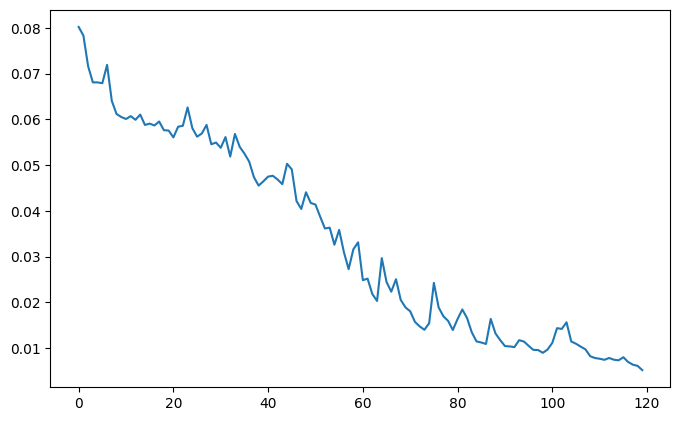

In [76]:
#PLOT GRAPH OF LOSSES PER EPOCH
plt.figure(figsize=(8,5),dpi=100)
plt.plot(history.history['loss'])

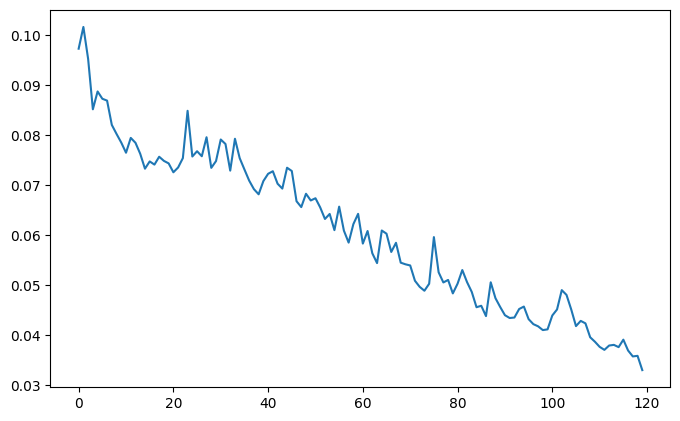

In [77]:
#PLOT GRAPH OF MEAN ABSOLUTE ERROR PER EPOCH
plt.figure(figsize=(8,5),dpi=100)
plt.plot(history.history['mean_absolute_error'])

In [92]:
#STACK DATA BY X AND Y BATCHES FOR TRANSFER FOR TEST DATASET
#FIRST CREATE TENSORS WITH NEEDFULL SHAPE
x_test = tf.experimental.numpy.empty(
    (0,10,3), dtype=np.float64)
y_test = tf.experimental.numpy.empty(
    (0,2), dtype=np.float64)

#PASSING THROUGH THE CYCLE AND SLICE DATA TO X AND Y BY WINDOW SIZE
for i in test_dict.keys():
  data=Train_Val_Window(test_dict[i], train_len=10, val_len=2, shift=2, label_column='Кол-во')
  for j,h in data:
    if j.shape[0]<10:
      break
    tens_d=tf.convert_to_tensor(j)
    tens_l=tf.convert_to_tensor(h)
    tens_d=tf.reshape(tens_d, shape=(-1,10, 3))
    tens_l=tf.reshape(tens_l, shape=(-1,2))
    x_test=tf.concat([x_train, tens_d], 0)
    y_test=tf.concat([y_train, tens_l], 0)

In [93]:
test_dataset=tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [94]:
batched_test_dataset=test_dataset.batch(9)

In [95]:
model.evaluate(batched_test_dataset)

763/763 [==============================] - 5s 6ms/step - loss: 0.2941 - mean_absolute_error: 0.2309


[0.29413220286369324, 0.23088563978672028]

In [ ]:
#SAVE MODEL FOR FUTURE USAGE
model.save('/content/gdrive/MyDrive/sale_forecast2')